Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2409
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0231 
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0192 
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0077 
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0070 
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


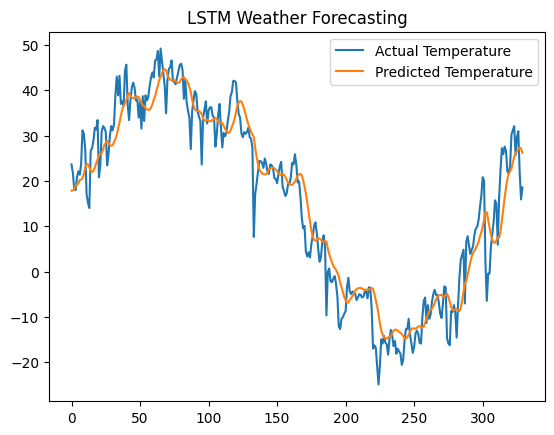

In [2]:
from tensorflow.keras.layers import LSTM

# Assume weather_data.csv has 'Temperature' column
data = pd.read_csv('GlobalWeatherRepository.csv')
temps = data['temperature_celsius'].values.reshape(-1, 1)

scaled_temps = scaler.fit_transform(temps)
#X, y = create_dataset(scaled_temps, time_step) # type: ignore
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=10, batch_size=32)

# Predict and visualize
predicted_temps = scaler.inverse_transform(model.predict(X))
actual_temps = scaler.inverse_transform(y)

plt.plot(actual_temps, label='Actual Temperature')
plt.plot(predicted_temps, label='Predicted Temperature')
plt.legend()
plt.title("LSTM Weather Forecasting")
plt.show()
